<a href="https://colab.research.google.com/github/code-pilgrim/hw/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 16.1 (Image Recognition: The Fashion-MNIST Dataset)

In [1]:
# load the Fashion-MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# check dimensions of images and labels
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
# visualize the images
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

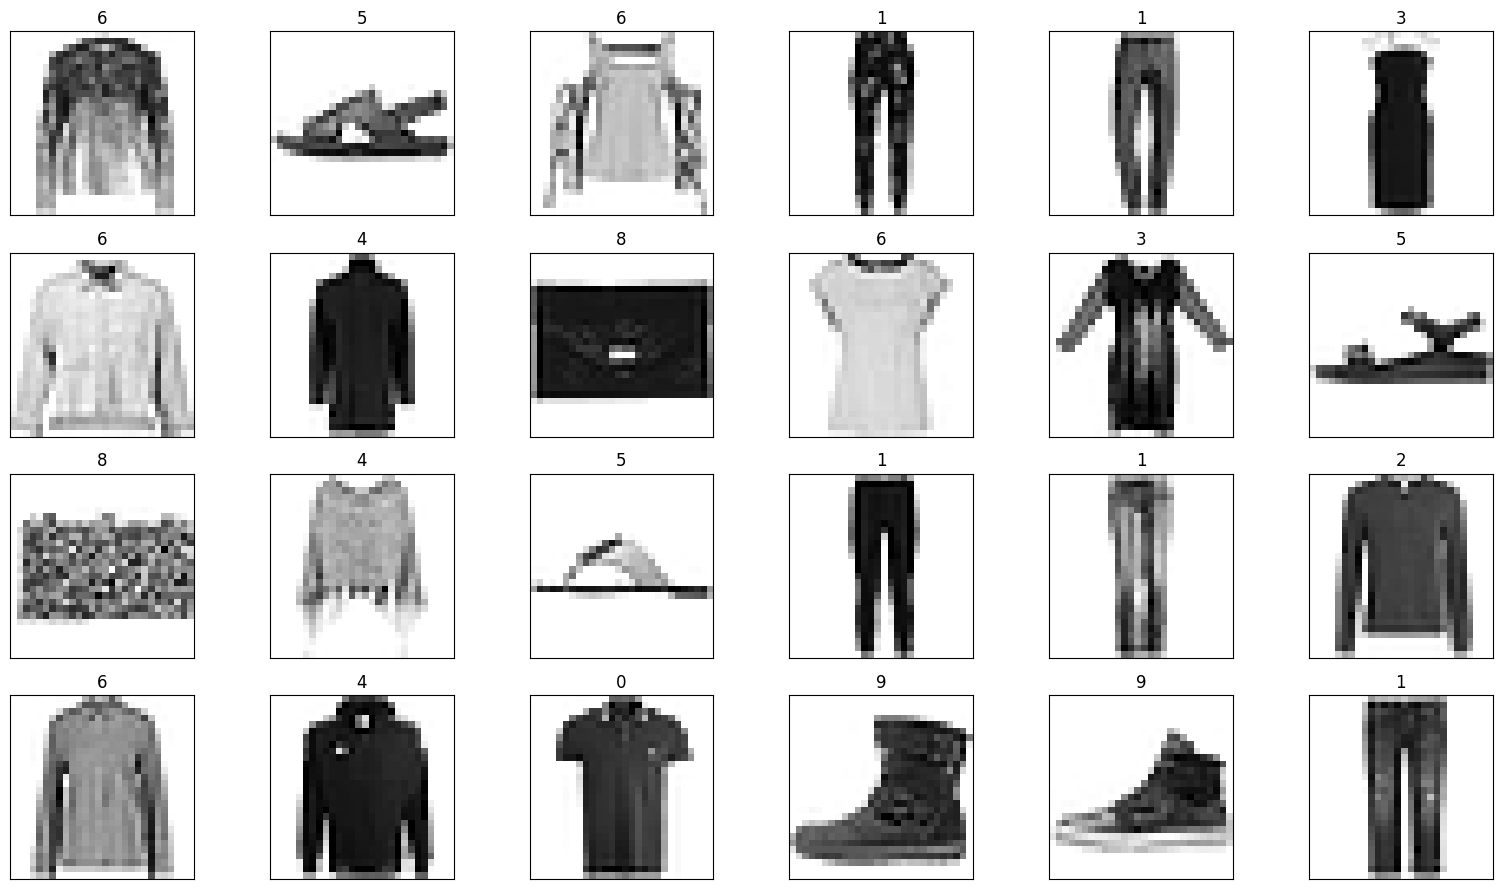

In [6]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)

plt.tight_layout()

In [7]:
# reshape image data
X_train = X_train.reshape((60000, 28, 28, 1))

X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test = X_test.reshape((10000, 28, 28, 1))

X_test.shape

(10000, 28, 28, 1)

In [9]:
# normalize the values
X_train = X_train.astype('float32') / 255

In [10]:
X_test = X_test.astype('float32') / 255

In [11]:
# one-hot encode the labels
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train)

y_train.shape

(60000, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
y_test = to_categorical(y_test)

y_test.shape

(10000, 10)

In [15]:
# configure the CNN
from tensorflow.keras.models import Sequential

cnn = Sequential()

In [16]:
# add layers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [17]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [20]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
cnn.add(Flatten())

16.4 (Convnet Layers)

In [22]:
cnn.add(Dense(units=4096, activation='relu', name='xception'))

In [23]:
cnn.add(Dense(units=128, activation='relu'))

In [24]:
cnn.add(Dense(units=10, activation='softmax'))

In [25]:
# print model summary
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Dense)                     │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

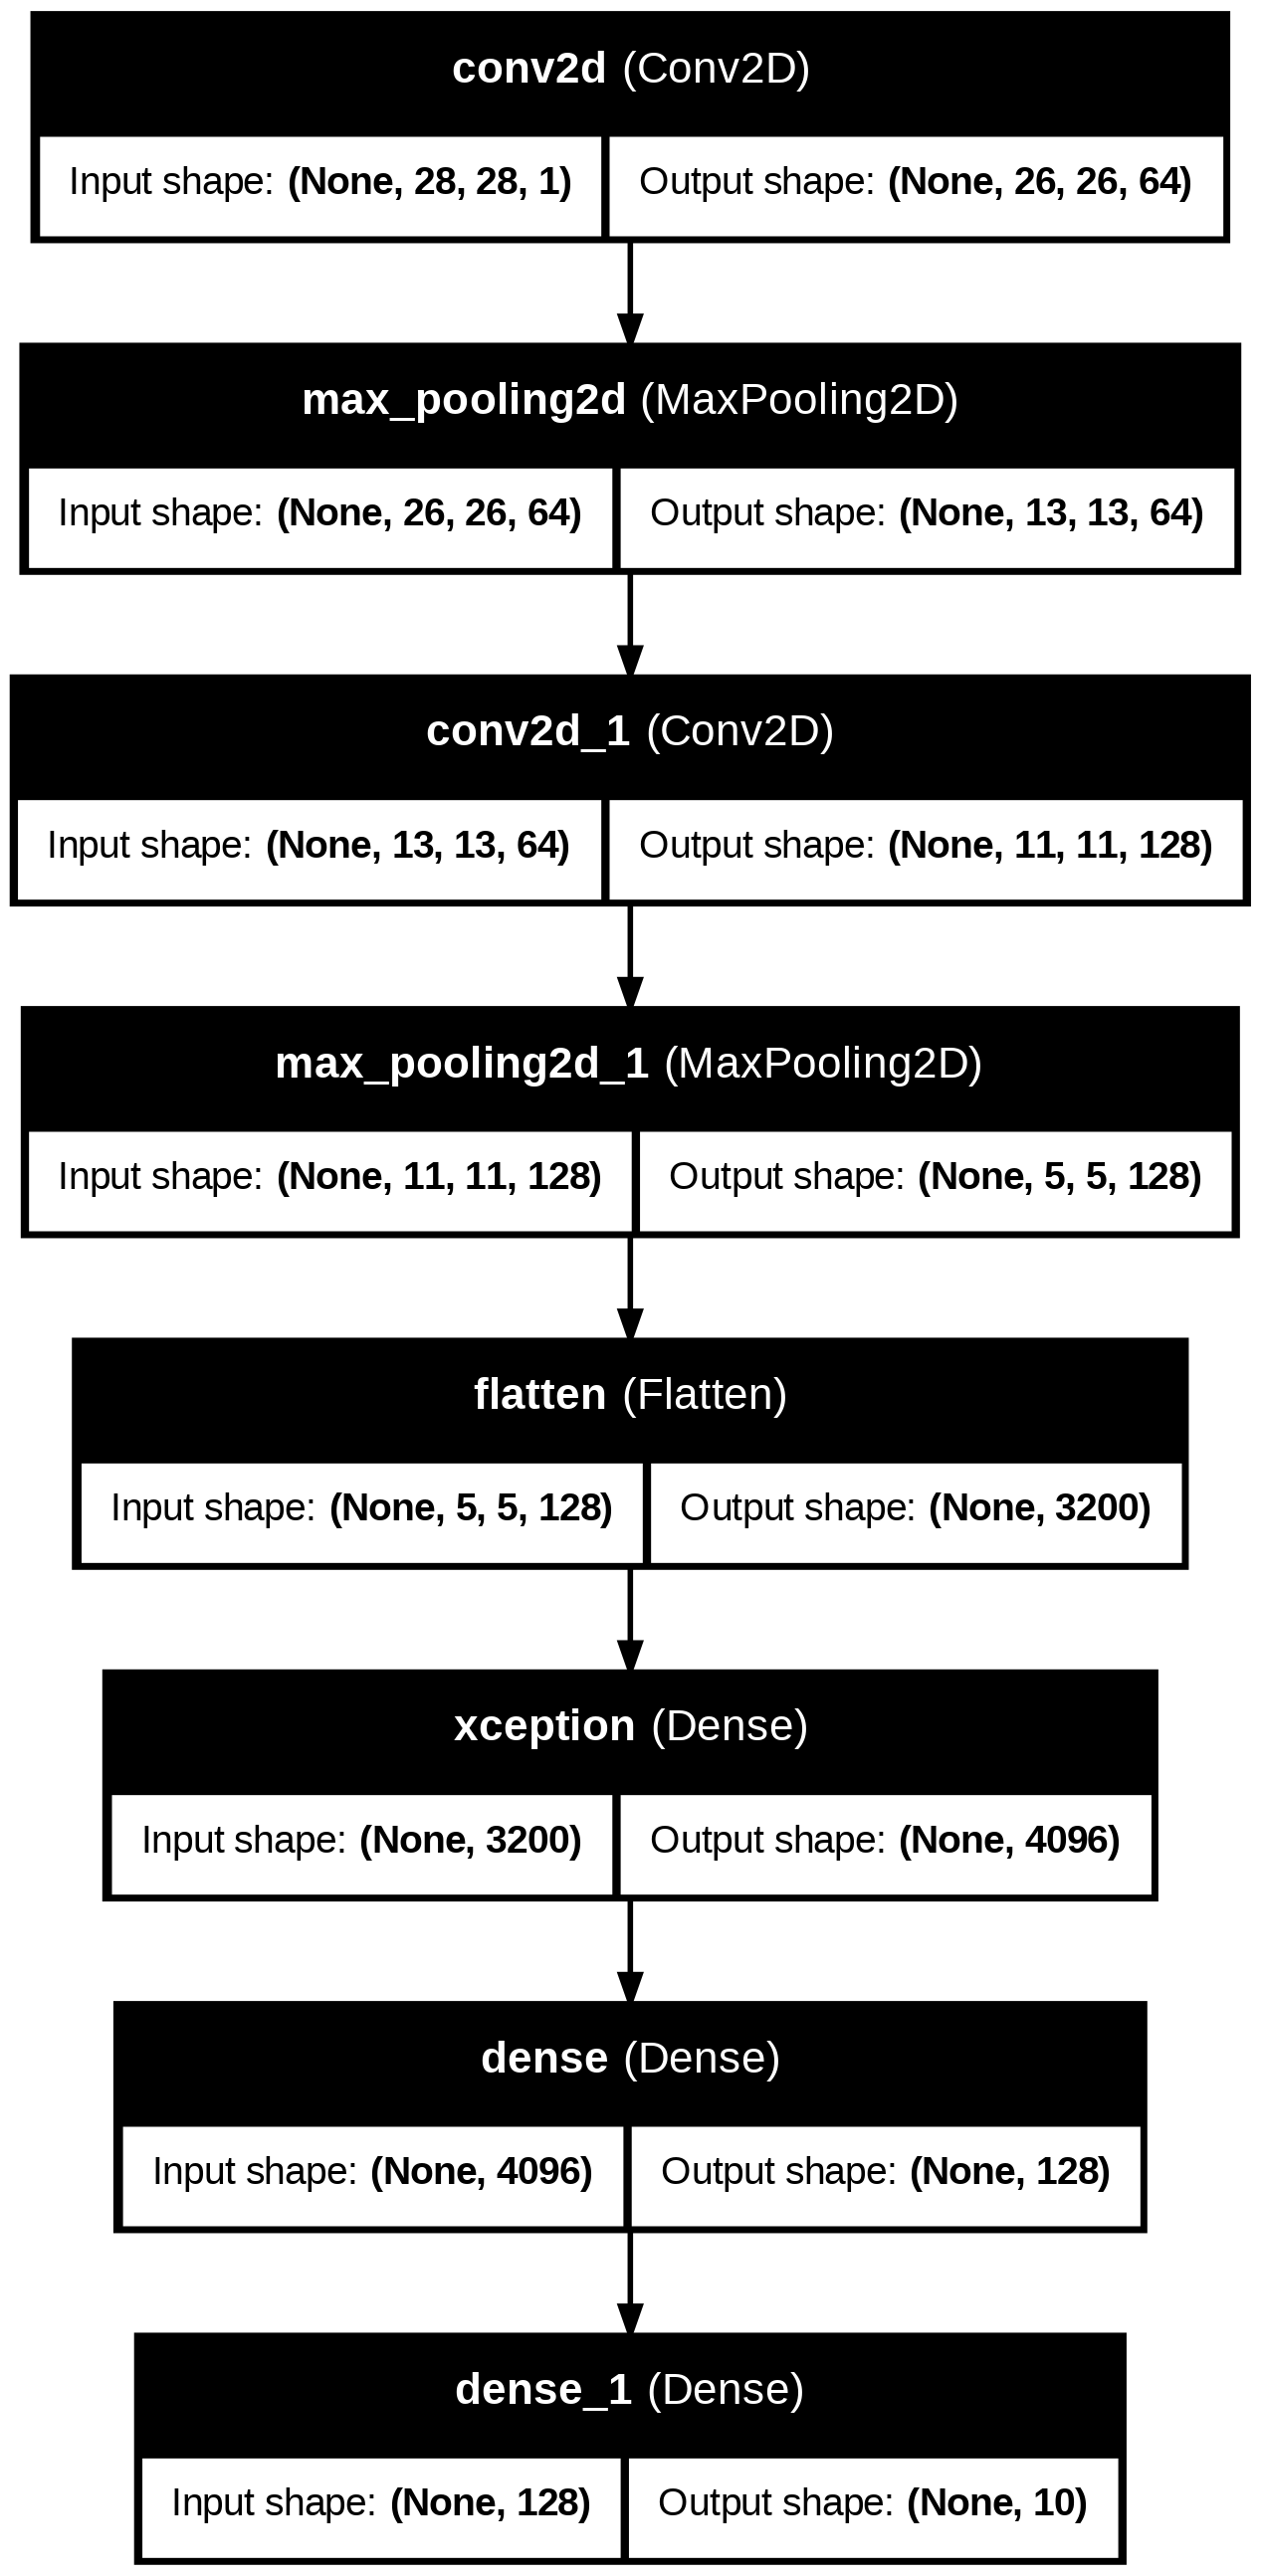

In [26]:
# visualize the model summary
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [27]:
# compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# (16.4 for input processing; Colab provided guidance how to preprocess inputs)
import keras
keras.applications.xception.preprocess_input:(X_train)
keras.applications.xception.preprocess_input:(y_train)

# train the model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 378s 444ms/step - accuracy: 0.7813 - loss: 0.5964 - val_accuracy: 0.8858 - val_loss: 0.3070
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 372s 432ms/step - accuracy: 0.8949 - loss: 0.2789 - val_accuracy: 0.9027 - val_loss: 0.2662
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 382s 432ms/step - accuracy: 0.9140 - loss: 0.2341 - val_accuracy: 0.9085 - val_loss: 0.2535
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 365s 432ms/step - accuracy: 0.9302 - loss: 0.1848 - val_accuracy: 0.9137 - val_loss: 0.2378
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 381s 432ms/step - accuracy: 0.9402 - loss: 0.1570 - val_accuracy: 0.9137 - val_loss: 0.2557


In [29]:
# evaluate model accuracy
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9026 - loss: 0.2856


In [30]:
loss

0.27405911684036255

In [31]:
accuracy

0.9053999781608582

In [32]:
# model predictions
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step


In [33]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [34]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000001158%
1: 0.0000001451%
2: 0.0000000435%
3: 0.0000000045%
4: 0.0000000017%
5: 0.0007874464%
6: 0.0000002034%
7: 0.0014076815%
8: 0.0000020057%
9: 99.9978005886%


In [35]:
# locate the incorrect predictions
images = X_test.reshape((10000, 28, 28))

In [36]:
incorrect_predictions = []

In [37]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)

  if predicted != expected:
    incorrect_predictions.append(
        (i, images[i], predicted, expected))

In [38]:
# total number of incorrect predictions
len(incorrect_predictions)

946

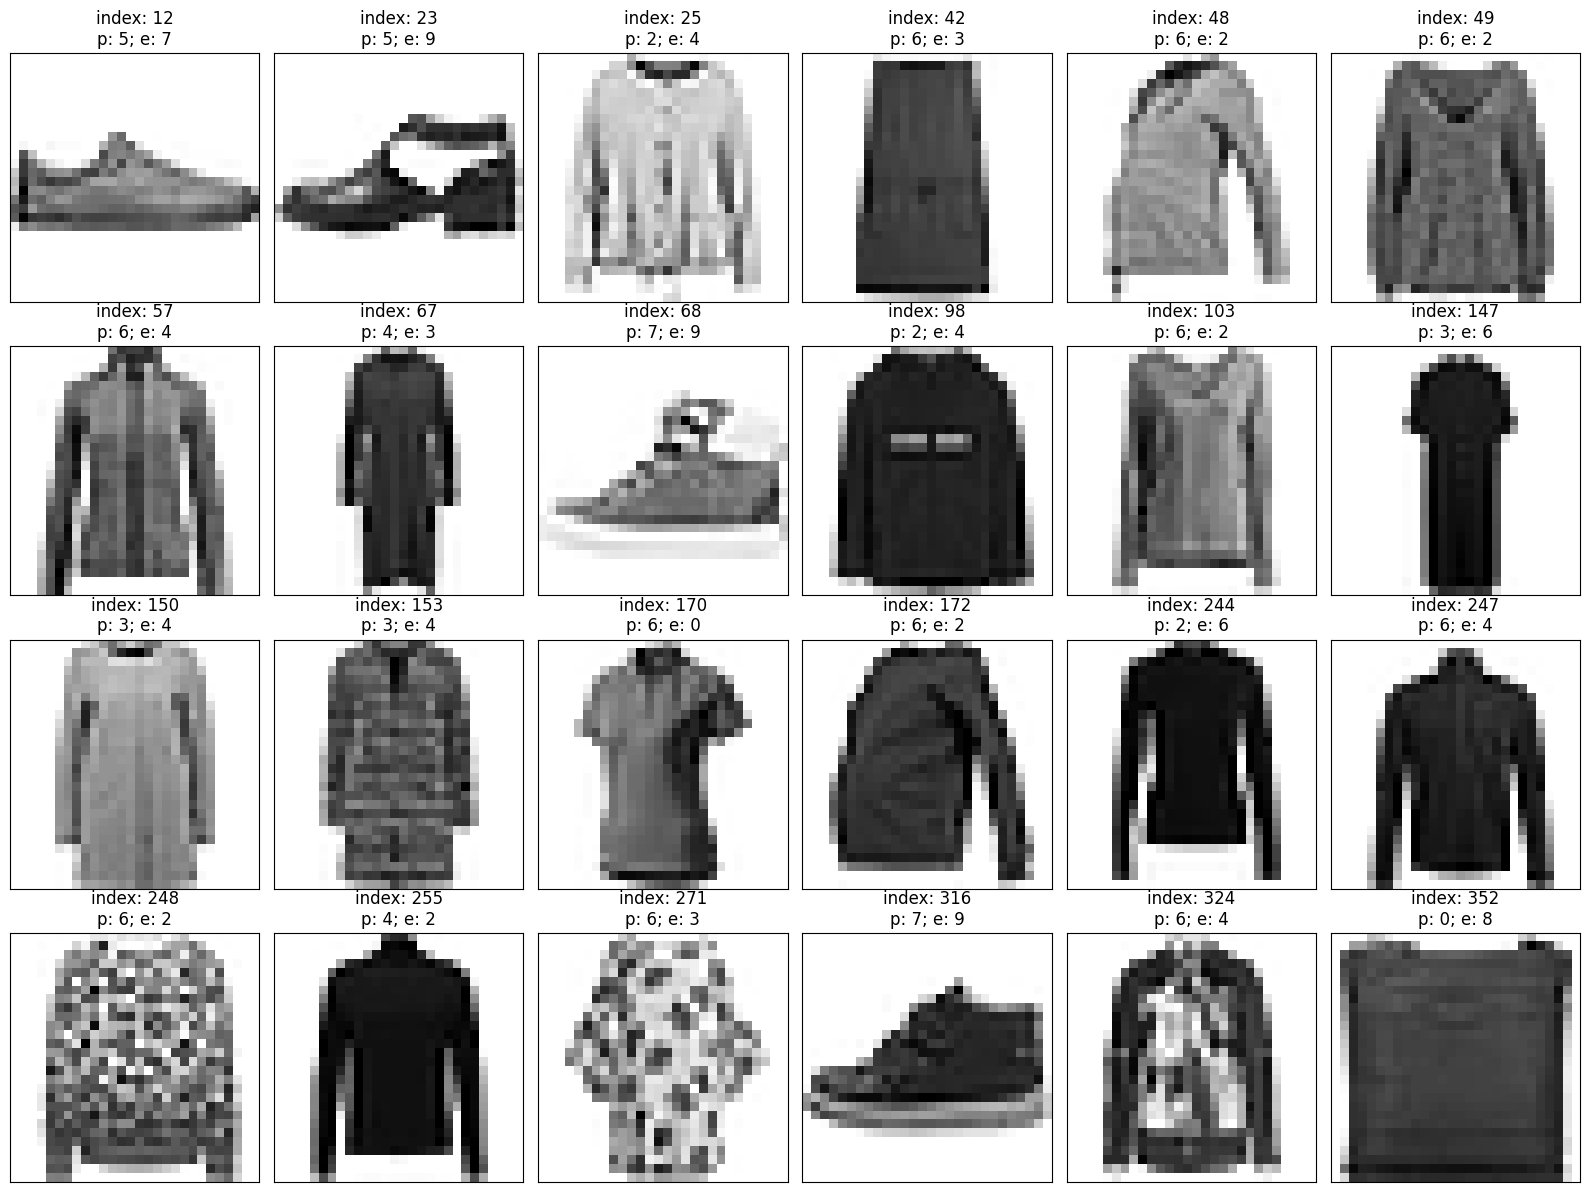

In [39]:
# visualize the incorrect predictions
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')

plt.tight_layout()

In [40]:
# display the probabilities of incorrect predictions
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [45]:
display_probabilities(predictions[12])

0: 0.0002679923%
1: 0.0013485389%
2: 0.0000814970%
3: 0.0013507476%
4: 0.0000592480%
5: 89.4894897938%
6: 0.0001713471%
7: 10.4609847069%
8: 0.0020684174%
9: 0.0441852550%


In [46]:
display_probabilities(predictions[153])

0: 0.3665261902%
1: 0.1108246506%
2: 1.3342544436%
3: 59.1956675053%
4: 24.9983832240%
5: 0.0089306690%
6: 13.9621764421%
7: 0.0035179331%
8: 0.0175924011%
9: 0.0021200349%


In [47]:
display_probabilities(predictions[324])

0: 0.0002017431%
1: 0.0000060281%
2: 0.0114296272%
3: 0.0000747762%
4: 5.4558653384%
5: 0.0000006557%
6: 94.5322751999%
7: 0.0000039474%
8: 0.0001351150%
9: 0.0000052058%


In [48]:
# save the model
cnn.save('fashion_mnist_cnn.h5')

16.1 The model performs worse for Fashion-MNIST than for MNIST, with a higher loss (0.256 vs. 0.029), a lower accuracy (90.9% vs. 99.1%) and more incorrect predictions (915 vs. 86).

The training times on Fashion-MNIST are slower, ranging from 122-146 seconds, compared to MNIST training times, which range from 105-143 seconds.

16.4 After executing the code with the additional Dense layer, the prediction accuracy slightly decreased to 90.5% and the speed is approximately 3 times slower (365 - 382 seconds).

### References

* fashion_mnist. (n.d.). TensorFlow. https://www.tensorflow.org/datasets/catalog/fashion_mnist

* Deitel, P., & Deitel, H. (2020). Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud. Pearson.

* GeeksforGeeks. (2023a, March 14). Fashion MNIST with Python Keras and Deep Learning. GeeksforGeeks. https://www.geeksforgeeks.org/fashion-mnist-with-python-keras-and-deep-learning/

* Keras Team. (n.d.). Keras documentation: Xception. https://keras.io/api/applications/xception/